# Lab04 逻辑回归

导入需要用到的包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


读入数据后，画出一个缩略图

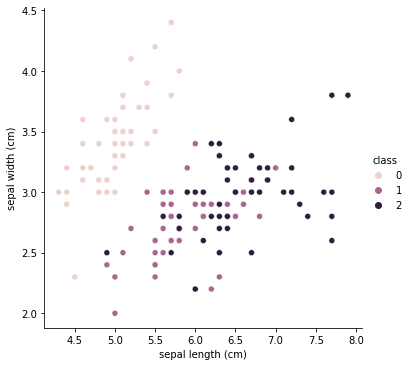

In [2]:
df = pd.read_csv('Data.csv')
sns.relplot(x='sepal length (cm)', y='sepal width (cm)', hue='class', data=df)

## 数据预处理与数据集划分

由于这里做的逻辑回归是一个二分类模型，所以我们把 0 作为一类，1 与 2作为另一类。然后我们按照3：7的比例划分数据集

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(['class'], axis=1).to_numpy()
Y = df['class'].to_numpy()

for i in range(Y.shape[0]):
    if Y[i] != 0:
        Y[i] = 1

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, shuffle=True)

## 实验任务

In [4]:
def sigmoid(x):
    return 1 / (np.exp(-x) + 1)


class LogisticsRegression(object):
    def __init__(self, X, _alpha=0.01, _epoch=10000, eps=1e-8):
        self.w_ = np.zeros(X.shape[1])
        self.cost_ = []
        self.alpha = _alpha
        self.epoch = _epoch
        self.eps = eps

    def cross_entropy(self, Y, X):
        m = len(Y)
        error = 0.0
        for i in range(X.shape[0]):
            error += Y[i] * np.log(self.eps + sigmoid(np.dot(self.w_, X[i]))) \
                + (1 - Y[i]) * np.log(self.eps + 1 - sigmoid(np.dot(self.w_, X[i])))
        return -error / m

    def fit(self, X, Y):
        for i in range(self.epoch):
            grad = np.zeros(X.shape[1])
            for _ in range(X.shape[0]):
                grad += (sigmoid(np.dot(self.w_, X[_])) - Y[_]) * X[_]
            self.w_ -= self.alpha * grad
            self.cost_.append(self.cross_entropy(Y, X))

    def predict(self, X):
        y_predict = np.zeros(len(X))
        for i in range(len(X)):
            y_predict[i] = 1 if np.dot(self.w_, X[i]) > 0 else 0
        return y_predict


## 测试结果

首先， 我们测试 `acc` 在训练集与测试集的结果，然后测试 `f1` 在训练集与测试集上的结果

In [5]:
from sklearn.metrics import accuracy_score, f1_score

lr = LogisticsRegression(train_X)
lr.fit(train_X, train_Y)
print("Training accuracy score")
print(accuracy_score(train_Y, lr.predict(train_X)))
print("Test accuracy score")
print(accuracy_score(test_Y, lr.predict(test_X)))

print("Training F1 score")
print(f1_score(train_Y, lr.predict(train_X)))
print("Test F1 score")
print(f1_score(test_Y, lr.predict(test_X)))

<ipython-input-4-525a4b0e22a3>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp(-x) + 1)


Training accuracy score
1.0
Test accuracy score
1.0
Training F1 score
1.0
Test F1 score
1.0


随后，我们使用`sklearn`中的模型来对比自己模型的效果

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_X, train_Y)
print("sklearn Test accuracy score")
print(accuracy_score(test_Y, model.predict(test_X)))


sklearn Test accuracy score
1.0


最后，我们画出模型训练时的 `loss` 函数图像（也就是交叉熵函数），为什么选择交叉熵函数呢？我们可以使用 `MSE` 作为损失函数训练一次后，画出 `MSE` 的图像与这个进行对比

不使用 `MSE` 的主要原因是在分类问题中，使用`sigmoid/softmx`得到概率，配合MSE损失函数时，采用梯度下降法进行学习时，会出现模型一开始训练时，学习速率非常慢的情况

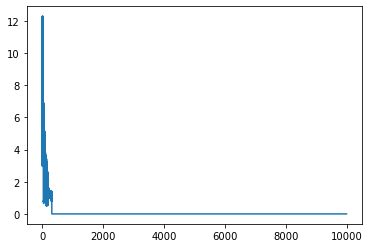

In [7]:
plt.plot(range(lr.epoch), lr.cost_)
plt.show()
